<a href="https://colab.research.google.com/github/vinaynamani/Jovian/blob/main/Copy_of_jovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
kaggle_data = od.download("https://www.kaggle.com/c/DontGetKicked",force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinaynamani
Your Kaggle Key: ··········


 78%|███████▊  | 8.00M/10.2M [00:00<00:00, 82.6MB/s]

100%|██████████| 10.2M/10.2M [00:00<00:00, 49.5MB/s]



Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zerotogbms-project')
jovian.set_colab_id('1BmFCV0YNcZgULeTJbtkzLcKG4JF813bF')

     |████████████████████████████████| 68 kB 2.7 MB/s 


# zerotogbms-project

Use the "Run" button to execute the code.

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
import jovian

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nvinay1586/zerotogbms-project


'https://jovian.ai/nvinay1586/zerotogbms-project'

# Jovain Course - Project (https://www.kaggle.com/c/DontGetKicked)

# Description : 
# One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

# Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

# Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

# The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy)

# Problem Statement : 
     In this Problem we need to predict if the car purchased at the Auction is a good / bad buy. 

# The data contains missing values.

# The dependent variable (IsBadBuy) is binary (C2).

# There are 32 Independent variables (C3-C34).

# The data set is split to 60% training and 40% testing

In [7]:
#The Dataset Contains 72983 rows and 34 columns

In [8]:
import numpy as np # Linear Algebra Operations
import pandas as pd # Data Manipulation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve # Performance metrics for Classification Problems
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations 
from imblearn.over_sampling import RandomOverSampler # for balancing the data
from sklearn.impute import SimpleImputer # Simple Imputer for filling the null values
from sklearn.preprocessing import StandardScaler # for Scaling the data to Standard Normalization
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Importing ensemble technique
from xgboost import XGBClassifier # importing Xtreme Gradient Boosting Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [128]:
# Reading The dataset from my Github Link as it is convinient for me
# df = pd.read_csv("DontGetKicked/training.csv")
df = pd.read_csv("https://raw.githubusercontent.com/vinaynamani/Jovian/main/training.csv")

In [129]:
df.shape #Checking the shape of the dataset

(72983, 34)

In [131]:
df.head() # Checking the first 5 rows of the dataset

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [132]:
#Extracting the Dependent Variable
target = df['IsBadBuy']

In [133]:
# Removing RefId & VehYear also, because VehYear and VehicleAge representing the Same values.
df.drop(['RefId',"VehYear"],1,inplace=True)

In [134]:
df.describe() # Checking the basic information of the Data

,IsBadBuy,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,0.328425,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,0.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,0.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,0.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,0.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,1.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  int64  
 1   PurchDate                          72983 non-null  object 
 2   Auction                            72983 non-null  object 
 3   VehicleAge                         72983 non-null  int64  
 4   Make                               72983 non-null  object 
 5   Model                              72983 non-null  object 
 6   Trim                               70623 non-null  object 
 7   SubModel                           72975 non-null  object 
 8   Color                              72975 non-null  object 
 9   Transmission                       72974 non-null  object 
 10  WheelTypeID                        69814 non-null  float64
 11  WheelType                          69809 non-null  obj

In [136]:
df.isnull().sum() / len(df) # Checing the Percentage of null values per Each Column.

IsBadBuy                             0.000000
PurchDate                            0.000000
Auction                              0.000000
VehicleAge                           0.000000
Make                                 0.000000
Model                                0.000000
Trim                                 0.032336
SubModel                             0.000110
Color                                0.000110
Transmission                         0.000123
WheelTypeID                          0.043421
WheelType                            0.043490
VehOdo                               0.000000
Nationality                          0.000069
Size                                 0.000069
TopThreeAmericanName                 0.000069
MMRAcquisitionAuctionAveragePrice    0.000247
MMRAcquisitionAuctionCleanPrice      0.000247
MMRAcquisitionRetailAveragePrice     0.000247
MMRAcquisitonRetailCleanPrice        0.000247
MMRCurrentAuctionAveragePrice        0.004316
MMRCurrentAuctionCleanPrice       

Conclusin : As we can see Only "PRIMEUNITI" & "AUCGUART" has a more than 95% of NULL-Values , so we are removing both the columns.

In [137]:
df.drop(["AUCGUART","PRIMEUNIT"],1,inplace=True)

In [138]:
# Extracting all the null columns from the dataset columns
null_cols = []
for column in df.columns:
    if df[column].isnull().sum() > 0:
        null_cols.append(column)

In [139]:
null_cols

['Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice']

In [140]:
categorical_null_cols = [column for column in null_cols if column not in df.select_dtypes(exclude="O")]
categorical_null_cols

['Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName']

In [141]:
numerical_null_cols = [column for column in null_cols if column in df.select_dtypes(exclude="O")]
numerical_null_cols

['WheelTypeID',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice']

In [142]:
#Creating an object for simple Imputer 
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [143]:
df[categorical_null_cols] = categorical_imputer.fit_transform(df[categorical_null_cols])

In [144]:
df.isnull().sum()

IsBadBuy                                0
PurchDate                               0
Auction                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                    0
SubModel                                0
Color                                   0
Transmission                            0
WheelTypeID                          3169
WheelType                               0
VehOdo                                  0
Nationality                             0
Size                                    0
TopThreeAmericanName                    0
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         315
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice        

In [145]:
numerical_imputer = SimpleImputer(strategy="mean")

In [146]:
df[numerical_null_cols] = numerical_imputer.fit_transform(df[numerical_null_cols])

In [147]:
# Checking the Dataframe after filling the numeric_null_cols wiht the simple imputer.
df.isnull().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

Conclusion : We have successfully filled the Numerical Null columns 

In [148]:
#as we have a date column we need to convert it into separate columns
df['year'] = pd.DatetimeIndex(df['PurchDate']).year
df['month'] = pd.DatetimeIndex(df['PurchDate']).month
df['date'] = pd.DatetimeIndex(df['PurchDate']).day

In [149]:
#Checking the DataFrame after Adding Year,Month and Date columns.
df

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,date
0,0,12/7/2009,ADESA,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.000000,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113,2009,12,7
1,0,12/7/2009,ADESA,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.000000,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053,2009,12,7
2,0,12/7/2009,ADESA,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.000000,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389,2009,12,7
3,0,12/7/2009,ADESA,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.000000,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,FL,4100.0,0,630,2009,12,7
4,0,12/7/2009,ADESA,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.000000,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,FL,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,12/2/2009,ADESA,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.000000,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,GA,4200.0,0,993,2009,12,2
72979,0,12/2/2009,ADESA,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,1.494299,Alloy,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,GA,6200.0,0,1038,2009,12,2
72980,0,12/2/2009,ADESA,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.000000,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,GA,8200.0,0,1893,2009,12,2
72981,0,12/2/2009,ADESA,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.000000,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,GA,7000.0,0,1974,2009,12,2


In [150]:
#removing PurchDate Column
df.drop('PurchDate',1,inplace=True)

In [151]:
# Making a dataframe with only Bad Purchases.
bad_buy_df = df[df['IsBadBuy']==1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


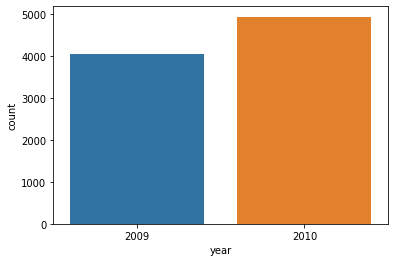

In [152]:
# Checking in which year we have most number of Bad Purchases.
sns.countplot(bad_buy_df['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


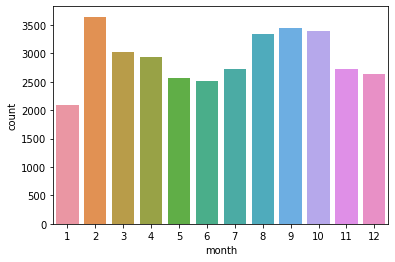

In [153]:
# Checking Based on month for year 2009
year_2009 = df[df['year']==2009]
sns.countplot(year_2009['month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


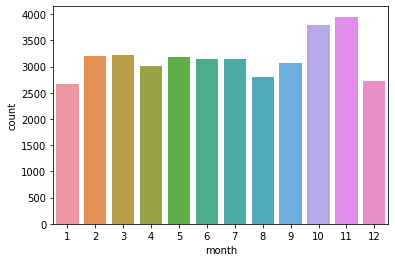

In [154]:
# Checking Based on month for year 2009
year_2010 = df[df['year']==2010]
sns.countplot(year_2010['month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


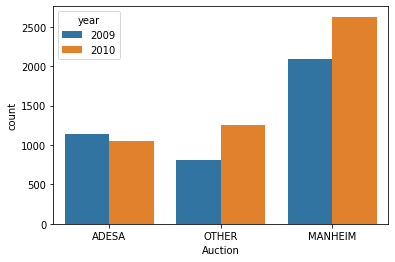

In [155]:
# Checking whether the Auction showing any impact on Bad Buy.
sns.countplot(bad_buy_df['Auction'],hue=bad_buy_df['year'])

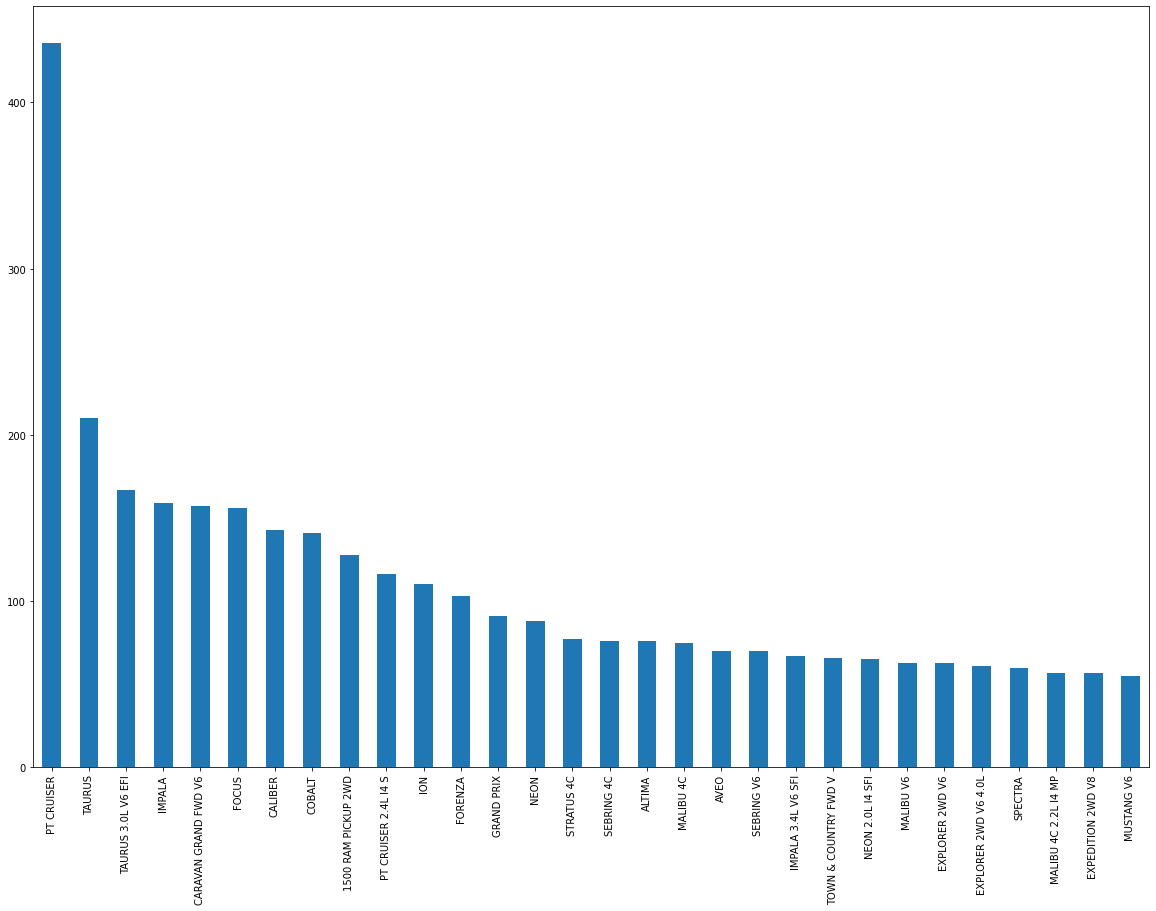

In [156]:
plt.figure(figsize=(20,14))
bad_buy_df["Model"].value_counts().head(30).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


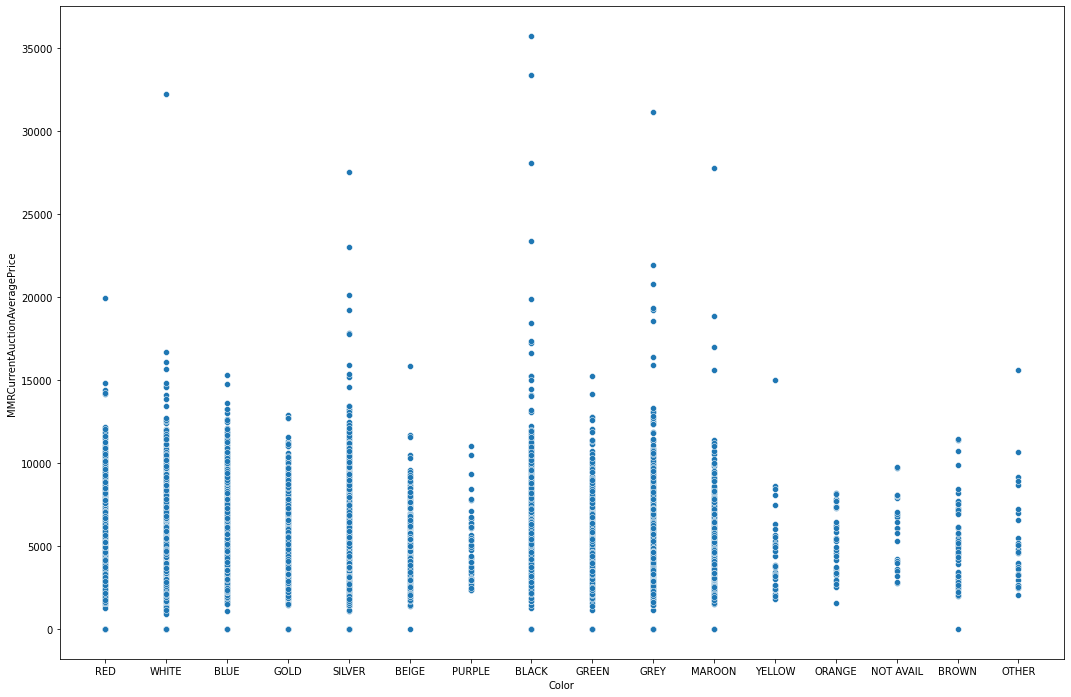

In [157]:
plt.figure(figsize=(18,12))
sns.scatterplot(bad_buy_df['Color'],bad_buy_df['MMRCurrentAuctionAveragePrice'])

In [158]:
# Extracting all the Categorical columns from the Dataset.
categorical_cols = [column for column in df.columns if column in df.select_dtypes(include="O")]

In [159]:
columns_with_high_labels=[]
for column in categorical_cols:
  labels = df[column].nunique()
  if labels > 20:
    columns_with_high_labels.append(column)


Conclusion : As we see columns like Make,Model,Trim,SubModel & VNST has very high number of labels , so after the mapping we don't see them in the Categorical columns
#columns_with_high_labels

In [160]:
# Mapping the Categorical columns with integers which has high labels.
# Mapping Make column.
labels = list(df['Make'].unique())
make_dict = {i:k for k ,i in enumerate(labels,0)}
df['Make'] = df['Make'].map(make_dict)

In [161]:
# Mapping Model column.
labels = list(df['Model'].unique())
model_dict = {i:k for k ,i in enumerate(labels,0)}
df['Model'] = df['Model'].map(model_dict)

In [162]:
# Mapping Trim column.
labels = list(df['Trim'].unique())
trim_dict = {i:k for k ,i in enumerate(labels,0)}
df['Trim'] = df['Trim'].map(trim_dict)

In [163]:
# Mapping SubModel column.
labels = list(df['SubModel'].unique())
submodel_dict = {i:k for k ,i in enumerate(labels,0)}
df['SubModel'] = df['SubModel'].map(submodel_dict)

In [164]:
# Mapping VNST column.
labels = list(df["VNST"].unique())
vnst_dict = {i:k for k ,i in enumerate(labels,0)}
df['VNST'] = df['VNST'].map(vnst_dict)

In [165]:
# Checking the DataFrame after the Transformation.
df

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,date
0,0,ADESA,3,0,0,0,0,RED,AUTO,1.000000,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,0,7100.0,0,1113,2009,12,7
1,0,ADESA,5,1,1,1,1,WHITE,AUTO,1.000000,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,0,7600.0,0,1053,2009,12,7
2,0,ADESA,4,1,2,2,2,MAROON,AUTO,2.000000,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,0,4900.0,0,1389,2009,12,7
3,0,ADESA,5,1,3,2,3,SILVER,AUTO,1.000000,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,0,4100.0,0,630,2009,12,7
4,0,ADESA,4,2,4,3,4,SILVER,MANUAL,2.000000,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,0,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,10,22,44,119,BLACK,AUTO,1.000000,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,14,4200.0,0,993,2009,12,2
72979,0,ADESA,2,7,104,11,47,SILVER,AUTO,1.494299,Alloy,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,14,6200.0,0,1038,2009,12,2
72980,0,ADESA,4,15,103,20,112,SILVER,AUTO,1.000000,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,14,8200.0,0,1893,2009,12,2
72981,0,ADESA,3,7,16,11,47,WHITE,AUTO,1.000000,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,14,7000.0,0,1974,2009,12,2


In [166]:
df.drop("IsBadBuy",1,inplace=True)

In [167]:
#checking categorical columns after  mapping the high labeled columns
categorical_cols = [column for column in df.columns if column in df.select_dtypes(include="O")]
len(categorical_cols)

7

In [168]:
categorical_cols

['Auction',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName']

In [169]:
numeric_cols = [column for column in df.columns if column in df.select_dtypes(exclude="O")]
print(len(numeric_cols))
numeric_cols

24


['VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'WheelTypeID',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'year',
 'month',
 'date']

In [170]:
#Encoding Categorical Columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [171]:
# Fitting the encoder with the Categorical Columns
encoder.fit(df[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [172]:
# Getting all the encoded labels from the Categorical columns.
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

45

In [173]:
# Transforming the Categorical columns into encoded columns.
df[encoded_cols] = encoder.fit_transform(df[categorical_cols])

In [174]:
# Whole DataFrame with Numerical and Categorical columns.
df[numeric_cols + encoded_cols]

,VehicleAge,Make,Model,Trim,SubModel,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,date,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,WheelType_Alloy,WheelType_Covers,WheelType_Special,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,3,0,0,0,0,1.000000,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,0,7100.0,0,1113,2009,12,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1,1,1,1,1.000000,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,0,7600.0,0,1053,2009,12,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,1,2,2,2,2.000000,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,0,4900.0,0,1389,2009,12,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,1,3,2,3,1.000000,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,0,4100.0,0,630,2009,12,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,2,4,3,4,2.000000,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,0,4000.0,0,1020,2009,12,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,8,10,22,44,119,1.000000,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,14,4200.0,0,993,2009,12,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72979,2,7,104,11,47,1.494299,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,14,6200.0,0,1038,2009,12,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72980,4,15,103,20,112,1.000000,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,14,8200.0,0,1893,2009,12,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72981,3,7,16,11,47,1.000000,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,14,7000.0,0,1974,2009,12,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [175]:
# Extracting all the Independent variables into X.
X = df[numeric_cols + encoded_cols]

In [176]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.3,random_state=355)

## Using RandomForestClassifier

In [177]:
#Creating an object of RandomForestClassifier
rfc = RandomForestClassifier()

In [178]:
# Fitting the random forest with training Data.
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
#Checking the score of Training Data
train_score = rfc.score(X_train,y_train)

In [180]:
#Checking the score of Test Data
test_score = rfc.score(X_test,y_test)

In [181]:
print(f"Train Score :: {train_score}")
print(f"Test Score :: {test_score}")

Train Score :: 0.9999608518634513
Test Score :: 0.900753596711578


In [182]:
#Checking how many test lables we have classified Correctly.
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve
pred = rfc.predict(X_test)

In [183]:
cf_matrix1 = confusion_matrix(y_test,pred)
cf_matrix1

array([[19143,    83],
       [ 2090,   579]])

As We got low accuracy on the test data let's check for the possible ways to increase the score

In [184]:
#Checing the given data is imbalanced or not.
target.value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

Conclusion : We have a class imbalance.

In [185]:
# We have done with the Independent Variables . Now check the target variable and look whether the data is imbalanced or not.
target.value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [186]:
# We can balance the data by using RandomOverSampler.
from imblearn.over_sampling import RandomOverSampler

In [187]:
# Creating an object with RandomOverSampler.
ros = RandomOverSampler()

In [188]:
# Resampling X & target data with RandomOverSampler
X_ros ,target_ros = ros.fit_resample(X,target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [189]:
#Checking the target variable whether we have balanced the data or not.
from collections import Counter
print(Counter(target_ros))

Counter({0: 64007, 1: 64007})


Now , We have Balanced The Data.

In [190]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ros,target_ros,test_size=0.3,random_state=355)

In [191]:
#Creating an object of RandomForestClassifier
rfc2 = RandomForestClassifier()

In [192]:
# Fitting the random forest with training Data.
rfc2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
#Checking the score of Training Data
train_score2 = rfc2.score(X_train,y_train)

In [194]:
#Checking the score of Test Data
test_score2 = rfc2.score(X_test,y_test)

In [195]:
# Printing the train_score & test_score
print(f"Train Score :: {train_score2}")
print(f"Test Score :: {test_score2}")

Train Score :: 1.0
Test Score :: 0.9906262205442


In [196]:
#Checking how many test labels we have classified properly.
pred2 = rfc2.predict(X_test)
cf_matrix2 = confusion_matrix(y_test,pred2)

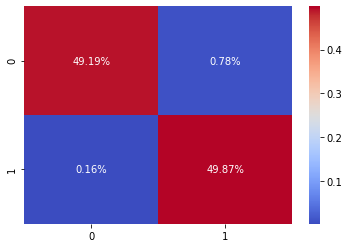

In [197]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2),annot=True,fmt='.2%',cmap='coolwarm')

In [198]:
# Comparing both the confusion metrics before and after balancing the data.
cf_matrix1

array([[19143,    83],
       [ 2090,   579]])

In [199]:
cf_matrix2

array([[18891,   299],
       [   61, 19154]])

Conclusion : We are able to decrease the total percentage of false predicted values . but slightly increased the False Positive Rate and But yes, we have decreased the False negative rate after balancing The data.

In this use case we need to correct guide the person who is going to buy the car , so we cannot guide a person into a situation where the purchase is bad and we predicted no it's not bad you can buy the Car.

In [200]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,pred2)

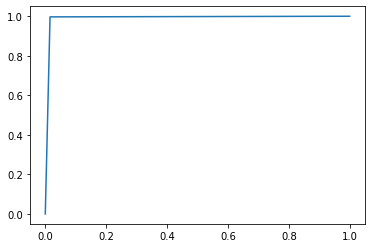

In [201]:
plt.plot(fpr,tpr)

In [202]:
# Let's try to check can we get more accuray without balancing the data, cause balancing the data is increasing the fpr.

Hyper Parameter Tuning.

In [203]:
# We are taking the data which is not balanced.
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.3,random_state=355)

In [204]:
# Using RandomizedSerachCV 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100,1000,5)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,5)]
min_samples_split = [3,4,5,6,9]
min_samples_leaf = [2,4,6,8]
random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [3, 4, 5, 6, 9], 'min_samples_leaf': [2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [205]:
# Creating an object for RandomForest
rf = RandomForestClassifier()
# Initializing the RandomSearchCV with Random grid parameters.
rf_random_grid = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                                    n_iter=10,cv=3,random_state=100,n_jobs=-1,verbose=2)
#training the random search with training Data
rf_random_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [206]:
# Checking the best score from random search
rf_random_grid.best_score_

0.8997024683383249

In [207]:
# Best estimator which can give best and robust score
random_rf = rf_random_grid.best_estimator_

In [208]:
random_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [209]:
 # train score
random_train_score = random_rf.score(X_train,y_train)

In [210]:
random_train_score

0.914578766050736

In [211]:
random_test_score = random_rf.score(X_test,y_test)

In [212]:
random_test_score

0.9005709065996803

#Using XGBClassifier

In [213]:
# Creating object of XGBClassifier
xgb = XGBClassifier()

In [214]:
# Training XGBClassifier with training Data.
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [215]:
# Train score using XGBClassifier
xgb_train_score = xgb.score(X_train,y_train)

In [216]:
# checking the train score
xgb_train_score

0.9001918258690886

In [217]:
# Predicting the test data
xgb_test_score = xgb.score(X_test,y_test)

In [218]:
xgb_test_score

0.9002055263758849

Hyper Parameter Optimization for XGBClassifier

In [219]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [220]:
# initializing a model with random params
xbgclassifier = XGBClassifier()
random_search=RandomizedSearchCV(xbgclassifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [221]:
# Fitting the random search with train data
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [222]:
# Best Score from random search
random_search.best_score_

0.7688260199417971

In [223]:
# creating an object with best parameters
random_xgb = random_search.best_estimator_

In [224]:
random_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [225]:
random_xgb.score(X_train,y_train)

0.9065925461948011

In [226]:
random_xgb.score(X_test,y_test)

0.9021694450787852

In [227]:
#using cross validation 
from sklearn.model_selection import cross_val_score
score = cross_val_score(random_xgb,X,target,cv=10)

In [228]:
# all the cross val scores
score

array([0.90642554, 0.87080422, 0.88299767, 0.88969581, 0.88777747,
       0.84625925, 0.8080296 , 0.90422033, 0.84831461, 0.85735818])

In [229]:
max(score)

0.9064255377448965

In [235]:
model = random_xgb

In [236]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[categorical_null_cols] = categorical_imputer.transform(input_df[categorical_null_cols])
    input_df[numerical_null_cols] = numerical_imputer.transform(input_df[numerical_null_cols])
    input_df["Model"] = model_dict[input_df["Model"][0]]
    input_df["Make"] = make_dict[input_df["Make"][0]]
    input_df["SubModel"] = submodel_dict[input_df["SubModel"][0]]
    input_df["VNST"] = vnst_dict[input_df["VNST"][0]]
    input_df["Trim"] = trim_dict[input_df["Trim"][0]]
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob
    print(X_input)

In [237]:
single_input={'VehicleAge':3,
 'Make':'MAZDA',
 'Model':'MAZDA3',
 'Trim':'i',
 'SubModel':'4D SEDAN I',
 'WheelTypeID':1.0,
 'VehOdo':89046,
 'MMRAcquisitionAuctionAveragePrice':8155.0,
 'MMRAcquisitionAuctionCleanPrice':9829.0,
 'MMRAcquisitionRetailAveragePrice':11636.0,
 'MMRAcquisitonRetailCleanPrice':13600.0,
 'MMRCurrentAuctionAveragePrice':7451.0,
 'MMRCurrentAuctionCleanPrice':13600.0,
 'MMRCurrentRetailAveragePrice':11597.0,
 'MMRCurrentRetailCleanPrice':12409.0,
 'BYRNO':21973,
 'VNZIP1':33619,
 'VNST':'FL',
 'VehBCost':7100.0,
 'IsOnlineSale':0,
 'WarrantyCost':1113,
 'year':2009,
 'month':12,
 'date':7,
 'Auction':'ADESA',
 'Color':'RED',
 'Transmission':'AUTO',
 'WheelType':'Alloy',
 'Nationality':'OTHER ASIAN',
 'Size':'MEDIUM',
 'TopThreeAmericanName':'OTHER'
    
}

In [238]:
input_df = pd.DataFrame([single_input])
input_df[numeric_cols]

,VehicleAge,Make,Model,Trim,SubModel,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,date
0,3,MAZDA,MAZDA3,i,4D SEDAN I,1.0,89046,8155.0,9829.0,11636.0,13600.0,7451.0,13600.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113,2009,12,7


In [239]:
predict_input(single_input)

(0, 0.9521537)

In [240]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nvinay1586/zerotogbms-project


'https://jovian.ai/nvinay1586/zerotogbms-project'

In [241]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nvinay1586/zerotogbms-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
